In [1]:
include("../../src/NumDiffEq.jl");

In [2]:
using Plots;

In [3]:
function f!(du,u,λ,t)
    du[1] = 3*u[1]*(1 - u[1]) - u[1]*u[2] - λ*(1-exp(-5*u[1]))
    du[2] = -u[2] + 3*u[1]*u[2]
end;

In [4]:
begin
    x_ini = [[0.0,0.0],[1.0,0.0],[1/3,2.0]]
    p_ini = 0.0
    Δs= 0.001
    p_fin = 0.9
    t = 0.0
end;

In [5]:
tiempo = @elapsed begin
    ramas_de_equilibrio = Equilibrium.(f!, x_ini, p_ini, t, Δs, p_fin)
    LBP = Limit_Points.(f!,ramas_de_equilibrio,t,p_fin)
    HBP = Hopf_Points.(f!,ramas_de_equilibrio,t,p_fin)
    estabilidad = Stability_intervals.(f!,t,ramas_de_equilibrio)
end;

In [6]:
begin
    LBP_2D = [[(LBP[i][j][1],LBP[i][j][2][1]) for j in 1:length(LBP[i])] for i in 1:length(LBP)]
    HBP_2D = [[(HBP[i][j][1],HBP[i][j][2][1]) for j in 1:length(HBP[i])] for i in 1:length(HBP)]
    estable = [[(estabilidad[i][1][j][1],estabilidad[i][1][j][2][1]) for j in 1:length(estabilidad[i][1])] for i in 1:length(estabilidad)]
    inestable = [[(estabilidad[i][2][j][1],estabilidad[i][2][j][2][1]) for j in 1:length(estabilidad[i][2])] for i in 1:length(estabilidad)]
end;

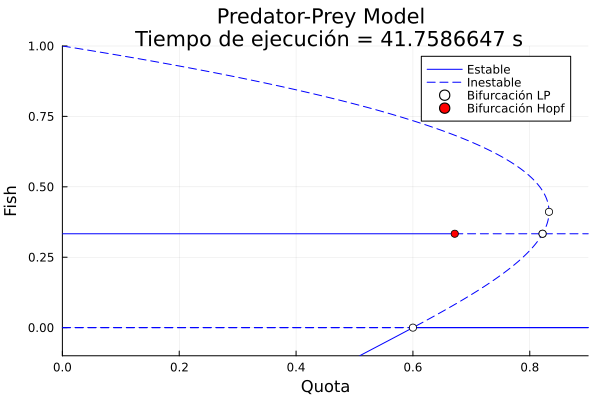

In [8]:
#begin
    plot(title = "Predator-Prey Model \n Tiempo de ejecución = $(tiempo) s", ylabel = "Fish", xlabel = "Quota")
    plot!(estable[1], label = "Estable", linestyle = :solid, color = "blue")
    plot!(inestable[1], label = "Inestable", linestyle = :dash, color = "blue")
    scatter!(LBP_2D[1], label = "Bifurcación LP", color = "white")
    scatter!(HBP_2D[1], label = "Bifurcación Hopf", color = "red")
    ylims!(-0.1,1.0)
    xlims!(0.0,0.9)

    for i in 1:length(ramas_de_equilibrio)
    plot!(estable[i], label = "", linestyle = :solid, color = "blue")
    plot!(inestable[i], label = "", linestyle = :dash, color = "blue")
    scatter!(LBP_2D[i], label = "", color = "white")
    scatter!(HBP_2D[i], label = "", color = "red")
    end

    plot!()

    #savefig("Predator-Prey fish.png")
#end;

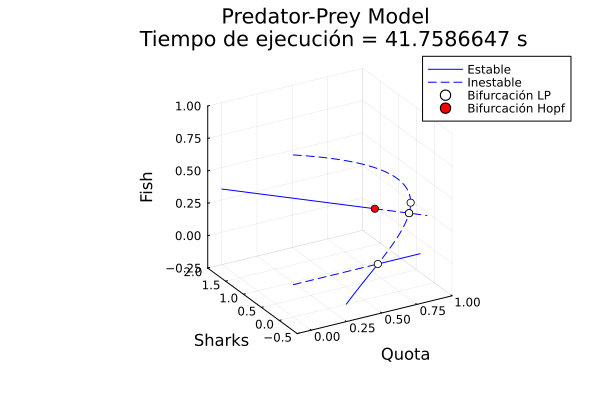

In [9]:
#begin
    LBP_3D = [[(LBP[i][j][2][2],LBP[i][j][1],LBP[i][j][2][1]) for j in 1:length(LBP[i])] for i in 1:length(LBP)]
    HBP_3D = [[(HBP[i][j][2][2],HBP[i][j][1],HBP[i][j][2][1]) for j in 1:length(HBP[i])] for i in 1:length(HBP)]

    plot(title = "Predator-Prey Model \n Tiempo de ejecución = $(tiempo) s", ylabel = "Quota", xlabel = "Sharks", zlabel = "Fish", camera = (60, 25))

    for i in 1:3
        x = zeros(length(ramas_de_equilibrio[i][1]))

        y_estable = zeros(length(ramas_de_equilibrio[i][1]))
        z_estable = zeros(length(ramas_de_equilibrio[i][1]))

        y_inestable = zeros(length(ramas_de_equilibrio[i][1]))
        z_inestable = zeros(length(ramas_de_equilibrio[i][1]))

        x = ramas_de_equilibrio[i][1]

        for j in 1:length(estabilidad[i][1])
            y_estable[j] = estabilidad[i][1][j][2][2]
            z_estable[j] = estabilidad[i][1][j][2][1]
        end

        for j in 1:length(estabilidad[i][2])
            y_inestable[j] = estabilidad[i][2][j][2][2]
            z_inestable[j] = estabilidad[i][2][j][2][1]
        end

        if i == 1
            plot!(y_estable,x,z_estable,xflip = true, color = "blue",linestyle = :solid, label = "Estable")
            plot!(y_inestable,x,z_inestable,xflip = true, color = "blue",linestyle = :dash, label = "Inestable")
            scatter!(LBP_3D[i], label = "Bifurcación LP", color = "white")
            scatter!(HBP_3D[i], label = "Bifurcación Hopf", color = "red")
        else
            plot!(y_estable,x,z_estable,xflip = true, color = "blue",linestyle = :solid, label = "")
            plot!(y_inestable,x,z_inestable,xflip = true, color = "blue",linestyle = :dash, label = "")
            scatter!(LBP_3D[i], label = "", color = "white")
            scatter!(HBP_3D[i], label = "", color = "red")
        end
    end


    ylims!(-0.1,1.0)
    xlims!(-0.5,2.0)
    zlims!(-0.25,1.0)
    #savefig("Predator-Prey Model.png")

    plot!()
#end

In [ ]:
begin
    #=
    for i in 1:length(x_ini)
        normas = []
        for j in 1:length(ramas_de_equilibrio[i][1])
            dx = zeros(length(x_ini))
            f!(dx,ramas_de_equilibrio[i][2][j],ramas_de_equilibrio[i][1][j],t)
            push!(normas,norm(dx))
        end
        if i == 2
            precision = plot(title = "Precisión de la rama", ylabel = "||F(u(λ),λ)||", xlabel = "λ")
            plot!(ramas_de_equilibrio[i][1],normas ,label = "λ_ini = $(p_ini), x_ini = $(x_ini[i])")
        else
            precision = plot(title = "Precisión de la rama", ylabel = "||F(u(λ),λ)|| / 1×10⁻¹⁶", xlabel = "λ")
            plot!(ramas_de_equilibrio[i][1],normas .* 1.e16 ,label = "λ_ini = $(p_ini), x_ini = $(x_ini[i])")
        end
        savefig("PrecisiónRama$(i).png")
    end
    =#
end

In [35]:
prueba = Equilibrium(f!,x_ini[3],p_ini,t,Δs,p_fin)
pb, xb = Hopf_Points(f!,prueba,t,p_fin)[1]

2-element Vector{Union{Float64, Vector{Float64}}}:
 0.671593847478832
  [0.3333333333333333, 0.3657615359771902]

In [36]:
using TaylorIntegration

In [49]:
function Initial_Periodic_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc)
    
    n = length(x)
    
    time, sol = taylorinteg(f!, x, 0.0, T, 20, 1.e-20, p)

    pc = (x - (x0 + wc*Δs)) ⋅ (2*π*ws/T0)

    psa = (x - x0) ⋅ wc - Δs

    return [sol[end,:] - sol[1,:] ; pc; psa]
    
end

Initial_Periodic_Orbits (generic function with 1 method)

In [55]:
function Initial_Jacobian_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc)
    
    n = length(x)

    s = Taylor1(2)
    r = copy(zero(s))

    J = zeros(n+2,n+2)

    for i in 1:n
        time, sol = taylorinteg(f!, x + [ i == j ? s : r for j in 1:n], 0.0, T, 20, 1.e-20, p + r)
        J[1:n,i] = differentiate.(sol[end,:] - sol[1,:])(0.0)
    end

    J[end - 1,1:n] = transpose((2*π*ws/T0))

    J[end,1:n] = transpose(wc)

    time, sol = taylorinteg(f!, x .+ r, 0.0, T, 20, 1.e-20, p + s)

    J[1:n,end-1] = differentiate.(sol[end,:] - sol[1,:])(0.0)
    
    time, sol = taylorinteg(f!, x, 0.0, T, 20, 1.e-20, p)

    f!(J[1:n,end], sol[end,:], p, time[end])

    return J
    
end

Initial_Jacobian_Orbits (generic function with 1 method)

In [56]:
function Function_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t)
    
    n = length(x)
    
    time, sol = taylorinteg(f!, x, 0.0, T, 20, 1.e-20, p)

    dx_old = zeros(n)
    
    f!(dx_old,x0,p0,t)
    
    pc = (x - x0) ⋅ dx_old

    psa = (x - x0) ⋅ xs + (p - p0)*ps + (T - T0)*Ts - Δs
    
    return [sol[end,:] - sol[1,:] ; pc; psa]
    
end

Function_Periodic_Orbits (generic function with 1 method)

In [57]:
function Jacobian_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t)
    
    n = length(x)

    s = Taylor1(2)
    r = copy(zero(s))

    dx_old = zeros(n)
    
    f!(dx_old,x0,p0,t)

    J = zeros(n+2,n+2)

    for i in 1:n
        time, sol = taylorinteg(f!, x + [ i == j ? s : r for j in 1:n], 0.0, T, 20, 1.e-20, p + r)
        J[1:n,i] = differentiate.(sol[end,:] - sol[1,:])(0.0)
    end

    J[end - 1,1:n] = dx_old

    J[end,1:n] = xs

    time, sol = taylorinteg(f!, x .+ r, 0.0, T, 20, 1.e-20, p + s)

    J[1:n,end-1] = differentiate.(sol[end,:] - sol[1,:])(0.0)

    J[end,end-1] = ps
    
    time, sol = taylorinteg(f!, x, 0.0, T, 20, 1.e-20, p)

    f!(J[1:n,end], sol[end,:], p, time[end])

    J[end,end] = Ts

    return J
    
end

Jacobian_Periodic_Orbits (generic function with 2 methods)

In [61]:
function Periodic_Orbits(f!, x_ini, p_ini, t, Δs, p_fin; N = 1000)

    s = Taylor1(2)
    r = Taylor1([0.0,0.0],2)

    n = length(x_ini)

    Jx = zeros(n,n)

    for i in 1:n
        for j in 1:n
            dx = [s for i in 1:n]
            f!(dx,x_ini + [j == k ? s : r for k in 1:n],p_ini+r,t+r)
            Jx[i,j] = differentiate(dx[i])(0.0)
        end
    end

    ω = abs(imag(eigvals(Jx)[1]))

    T_ini = 2*π/ω

    X = [x_ini]
    P = [p_ini]
    TP = [T_ini]

    W = nullspace([-ω*I(n) Jx; Jx ω*I(n)])

    ws = W[:,1][1:n]
    wc = W[:,1][n+1:end]

    x0 = x_ini
    p0 = p_ini
    T0 = T_ini

    x = x_ini .+ Δs*wc
    p = p_ini
    T = T_ini

    i = 1

    println(Initial_Jacobian_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc))
    
    while i <= 30 && norm(Initial_Periodic_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc)) > 1.e-16
        Δ = -inv(Initial_Jacobian_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc))*Initial_Periodic_Orbits(f!, x, p, T, x0, p0, T0, t, ws, wc)
        x += Δ[1:n]
        p += Δ[end-1]
        T += Δ[end]
        i += 1
    end

    x0 = deepcopy(x)
    p0 = deepcopy(p)
    T0 = deepcopy(T)

    xs = zeros(n)
    ps = 0.0
    Ts = 0.0

    ΔS = nullspace(Jacobian_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t)[1:end-1,:])

    xs = ΔS[1:n]
    ps = ΔS[end-1]
    Ts = ΔS[end]

    j = 1

    while p_ini <= p <= p_fin && j <= N
        
        i = 1
        
        while i <= 30 && norm(Function_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t)) > 1.e-16
            Δ = -inv(Jacobian_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t))*Function_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t )
            x += Δ[1:n]
            p += Δ[end-1]
            T += Δ[end]
            i += 1
        end

        x0 = deepcopy(x)
        p0 = deepcopy(p)
        T0 = deepcopy(T)
    
        ΔS = nullspace(Jacobian_Periodic_Orbits(f!, x, p, T, x0, p0, T0, xs, ps, Ts, t)[1:end-1,:])
    
        xs = ΔS[1:n]
        ps = ΔS[end-1]
        Ts = ΔS[end]

        push!(X,x)
        push!(P,p)
        push!(TP,T)

        println(j)
        
        j += 1
        
    end

    return P, X, TP
    
end

Periodic_Orbits (generic function with 2 methods)

In [62]:
P, X, T = Periodic_Orbits(f!, xb, pb, t, 0.01, p_fin; N = 50)

[-0.00010165981563581283 0.0011445534168681715 0.10359240309029683 0.0; -0.0012859856162455996 -0.00033550647002966727 0.06680123656714847 0.0; -0.29192854000767476 0.0 0.0 0.0; 0.0 0.8757856200230245 0.0 0.0]


LoadError: SingularException(4)

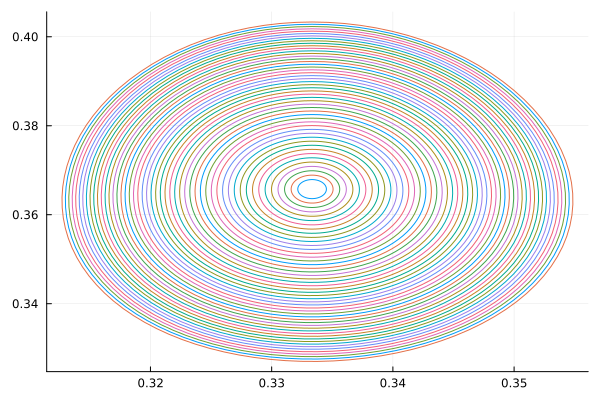

In [30]:
plot(leg = false)

for i in 2:length(P)
    time = 0.0:T[i]/100:T[i]
    sol = taylorinteg(f!,X[i],time,20,1.e-20,P[i])
    plot!(sol[:,1],sol[:,2])
end

plot!()

In [33]:
time, sol = taylorinteg(f!,X[end],0.0,T[end],20,1.e-20,P[end])

([0.0, 0.5878039903514686, 1.1931919880073432, 1.8193301173823089, 2.4551739829608854, 3.1380700466509284, 3.8332513718732892, 4.542302134542614, 5.188277353169778, 5.838398412996142, 6.4764983737086395, 7.085420888307747, 7.699252426799007, 8.327845913567028, 8.912862173165747, 9.507921185192414, 10.096632182756338, 10.420614595117742], [0.3333333333333333 0.4033208175815942; 0.32607898041045597 0.40071278048541664; … ; 0.3374602262984625 0.4025117681256195; 0.3333333333333329 0.4033208175815954])

In [34]:
sol[end,:] - sol[1,:]

2-element Vector{Float64}:
 -3.885780586188048e-16
  1.1657341758564144e-15